# 데이터 스케일링

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 1. 이상치 처리
이상치를 설정하는 것에 ESD/기하평균/사분위수 방법이 있다. 여기선 ESD방식으로 이상치를 처리해주었다. 그 이유로 3번은 이상치로 분류되는 값의 개수가 너무 많고, 1로 하면 이상치 개수는 적어지지만 왜도가 3번 방법에 비해 높았다. but 왜도를 더 줄이는 것을 포기하고 이상치 개수를 줄이는 것 선택, 즉 ESD방법으로 이상치를 처리했다.   
- 이상값의 인식 방법
- 평균으로부터 3 표준편차 떨어진 값을 이상치로 판단

In [59]:
df = pd.read_excel('data/퉁치기_최종.xlsx', index_col = 0)
df.head()

,dong_code,drunk_value,light_value,vet_value,park_value,cvs_value,cafe_value,restaurant_value,coin_value,bike_value,nail_value,derma_value,health_value,bus_value,subway_value
dong,,,,,,,,,,,,,,,
사직동,1101053,42,527,1,3,21,120,740,1,14,10,1,16,33,6
삼청동,1101054,11,383,0,1,13,109,187,0,5,0,0,2,16,0
부암동,1101055,7,813,3,1,19,59,87,0,5,0,0,1,34,0
평창동,1101056,15,1364,0,0,17,50,98,0,4,3,1,5,57,0
무악동,1101057,6,153,0,0,5,8,32,0,3,1,0,0,3,0


In [60]:
#왜도 첨도 확인
for col in df: print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df[col].skew()) , ' ' , 'Kurtosis: {:06.2f}'.format(df[col].kurt()) )

dong_code       Skewness: -0.09   Kurtosis: -01.25
drunk_value     Skewness: 04.60   Kurtosis: 031.23
light_value     Skewness: 00.84   Kurtosis: 001.63
vet_value       Skewness: 01.05   Kurtosis: 001.79
park_value      Skewness: 01.86   Kurtosis: 003.34
cvs_value       Skewness: 03.86   Kurtosis: 029.26
cafe_value      Skewness: 05.33   Kurtosis: 042.53
restaurant_value Skewness: 03.81   Kurtosis: 022.76
coin_value      Skewness: 03.67   Kurtosis: 020.23
bike_value      Skewness: 03.03   Kurtosis: 016.05
nail_value      Skewness: 03.68   Kurtosis: 023.21
derma_value     Skewness: 05.84   Kurtosis: 044.00
health_value    Skewness: 04.10   Kurtosis: 025.84
bus_value       Skewness: 01.35   Kurtosis: 002.92
subway_value    Skewness: 03.57   Kurtosis: 020.78


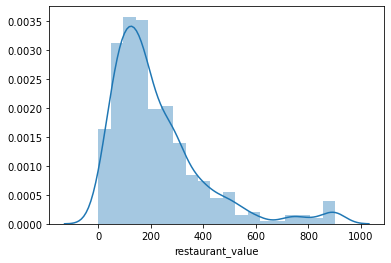

In [45]:
sns.distplot(df['restaurant_value'])

In [5]:
np.mean(df['drunk_value']) + 3*np.std(df['drunk_value']) # 평균 + 3*표준편차 이상을 이상치로 보고 엑셀가서 고쳐주고 왔음, 이상치 203

202.01008994082238

In [5]:
np.mean(df['light_value']) + 3*np.std(df['light_value']) # 이상치 1516

1515.9659745127224

In [6]:
np.mean(df['vet_value']) + 3*np.std(df['vet_value']) # 이상치 7

6.939159252104255

In [7]:
np.mean(df['park_value']) + 3*np.std(df['park_value']) # 이상치 2

1.969599259354955

In [8]:
np.mean(df['cvs_value']) + 3*np.std(df['cvs_value']) # 이상치 77

76.60608970291761

In [9]:
np.mean(df['cafe_value']) + 3*np.std(df['cafe_value']) # 이상치 222

221.90942515673524

In [10]:
np.mean(df['restaurant_value']) + 3*np.std(df['restaurant_value']) # 이상치 902

901.0482032878012

In [11]:
np.mean(df['coin_value']) + 3*np.std(df['coin_value']) # 이상치 8

7.086561173309782

In [12]:
np.mean(df['bike_value']) + 3*np.std(df['bike_value']) # 이상치 18

17.495163550596956

In [13]:
np.mean(df['nail_value']) + 3*np.std(df['nail_value']) # 이상치 32

31.33873257837511

In [14]:
np.mean(df['derma_value']) + 3*np.std(df['derma_value']) # 이상치 10

9.204801290043136

In [15]:
np.mean(df['health_value']) + 3*np.std(df['health_value']) # 이상치 29

28.456078841556824

In [16]:
np.mean(df['bus_value']) + 3*np.std(df['bus_value']) # 이상치 72

71.86805268324991

In [17]:
np.mean(df['subway_value']) + 3*np.std(df['subway_value']) # 이상치 35

34.89087912411047

### 2. 전체 지표 z-score화

In [61]:
# 전처리한 엑셀파일 로드
df = pd.read_excel('data/퉁치기_최종_ESD.xlsx', index_col = 0)

In [62]:
df1 = df.iloc[0:,1:] #인덱스와 z-score할 칼럼만 불러오기

In [63]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()
sdscaler.fit(df1)

StandardScaler()

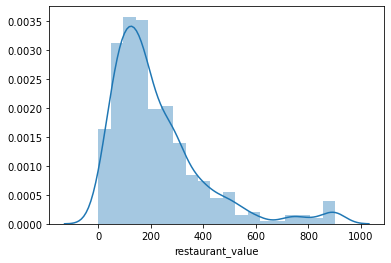

In [64]:
sns.distplot(df1['restaurant_value'])

In [65]:
#햔번에 정규화
normal = sdscaler.transform(df1)
df1 = pd.DataFrame(normal, columns = df1.columns)
df1

,drunk_value,light_value,vet_value,park_value,cvs_value,cafe_value,restaurant_value,coin_value,bike_value,nail_value,derma_value,health_value,bus_value,subway_value
0,0.067408,0.032684,-0.619052,3.171171,-0.038235,1.839779,2.908830,-0.082602,2.638125,0.378813,-0.056587,1.720580,0.456290,0.081691
1,-0.709587,-0.413307,-1.246969,1.309641,-0.566682,1.582980,-0.195640,-0.687872,0.067868,-1.191876,-0.615882,-0.659116,-0.713166,-0.651800
2,-0.809845,0.918473,0.636782,1.309641,-0.170346,0.415712,-0.757027,-0.687872,0.067868,-1.191876,-0.615882,-0.829094,0.525082,-0.651800
3,-0.609330,2.625011,-1.246969,-0.551889,-0.302458,0.205604,-0.695274,-0.687872,-0.217716,-0.720669,-0.056587,-0.149181,2.107288,-0.651800
4,-0.834909,-1.125655,-1.246969,-0.551889,-1.095129,-0.774901,-1.065790,-0.687872,-0.503300,-1.034807,-0.615882,-0.999072,-1.607456,-0.651800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-0.985296,-1.463246,-0.619052,1.309641,-1.425408,-0.961664,-1.166840,-0.687872,2.066957,-1.191876,-0.615882,-0.829094,-0.094042,-0.651800
421,-0.985296,-1.128752,-1.246969,-0.551889,-1.293296,-0.844937,-1.194909,-0.687872,-0.788884,-0.877738,-0.615882,-0.999072,-0.713166,-0.651800
422,-0.985296,-1.568550,-1.246969,1.309641,-0.896961,-0.634829,-1.043334,-0.687872,1.781373,-1.034807,-0.056587,-0.489138,-0.094042,0.448436
423,-0.985296,-1.484926,-1.246969,-0.551889,-1.227240,-0.891628,-1.245434,-0.687872,-1.074468,-1.191876,-0.615882,-0.999072,-1.263499,-0.651800


In [66]:
df1.describe()

,drunk_value,light_value,vet_value,park_value,cvs_value,cafe_value,restaurant_value,coin_value,bike_value,nail_value,derma_value,health_value,bus_value,subway_value
count,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02
mean,-5.224579e-19,-1.750234e-16,3.239239e-17,9.351996e-17,5.224579e-17,3.657205e-18,2.507798e-17,-7.993606e-17,-1.290471e-16,-6.076185e-16,6.206800e-16,-3.369853e-17,-1.044916e-18,3.301934e-16
std,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00
min,-9.852957e-01,-1.599521e+00,-1.246969e+00,-5.518889e-01,-1.425408e+00,-9.616640e-01,-1.245434e+00,-6.878723e-01,-1.360052e+00,-1.191876e+00,-6.158822e-01,-9.990724e-01,-1.745040e+00,-6.517998e-01
25%,-6.343943e-01,-7.447040e-01,-6.190522e-01,-5.518889e-01,-7.648492e-01,-6.114836e-01,-6.896606e-01,-6.878723e-01,-7.888841e-01,-7.206694e-01,-6.158822e-01,-6.591158e-01,-7.131662e-01,-6.517998e-01
50%,-3.336217e-01,-2.616193e-02,8.864709e-03,-5.518889e-01,-2.364023e-01,-3.313393e-01,-2.910759e-01,-8.260164e-02,-2.177159e-01,-2.494625e-01,-6.158822e-01,-3.191593e-01,-1.628337e-01,-5.295514e-01
75%,2.177948e-01,5.653964e-01,6.367816e-01,1.309641e+00,3.581005e-01,1.822586e-01,3.320637e-01,5.226690e-01,3.534523e-01,3.788134e-01,-5.658747e-02,1.907756e-01,5.250819e-01,4.484360e-01
max,4.102774e+00,3.095780e+00,3.148449e+00,3.171171e+00,3.660894e+00,4.221006e+00,3.818277e+00,4.154293e+00,3.780462e+00,3.834331e+00,4.977066e+00,3.930298e+00,3.139161e+00,3.626895e+00


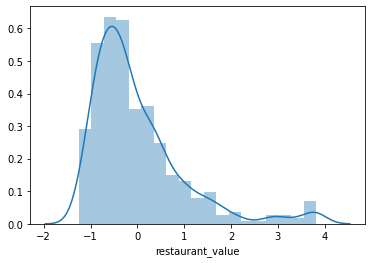

In [67]:
sns.distplot(df1['restaurant_value'])

### 3. 각 칼럼별 log화를 for문으로 진행

In [68]:
# 기존 칼럼 리스트(values) 와 새로 생겨야 할 칼럼 리스트(logs) 를 작성

values = ['drunk_value', 'light_value', 'vet_value', 'park_value', 'cvs_value',
       'cafe_value', 'restaurant_value', 'coin_value', 'bike_value',
       'nail_value', 'derma_value', 'health_value', 'bus_value',
       'subway_value']
logs = ['drunk_log', 'light_log', 'vet_log', 'park_log', 'cvs_log',
       'cafe_log', 'restaurant_log', 'coin_log', 'bike_log',
       'nail_log', 'derma_log', 'health_log', 'bus_log',
       'subway_log']

In [69]:
# log화하는 함수 작성 -> 파라미터값에 기존 칼럼 / 로그화된 칼럼 올수 있도록 함
def value_to_log(value,log):
        df1[log] = df1[value] - min(df1[value]) + 10
        df1[log] = np.log10(df1[log])

In [70]:
# 칼럼의 개수만큼 for문 진행
for i in range(0,14):
    value_to_log(values[i],logs[i])

In [71]:
# df1 확인
df1

,drunk_value,light_value,vet_value,park_value,cvs_value,cafe_value,restaurant_value,coin_value,bike_value,nail_value,...,cvs_log,cafe_log,restaurant_log,coin_log,bike_log,nail_log,derma_log,health_log,bus_log,subway_log
0,0.067408,0.032684,-0.619052,3.171171,-0.038235,1.839779,2.908830,-0.082602,2.638125,0.378813,...,1.056416,1.107259,1.150887,1.025522,1.146071,1.063359,1.023635,1.104475,1.086407,1.030741
1,-0.709587,-0.413307,-1.246969,1.309641,-0.566682,1.582980,-0.195640,-0.687872,0.067868,-1.191876,...,1.035779,1.098458,1.043354,1.000000,1.057967,1.000000,1.000000,1.014519,1.042649,1.000000
2,-0.809845,0.918473,0.636782,1.309641,-0.170346,0.415712,-0.757027,-0.687872,0.067868,-1.191876,...,1.051348,1.056042,1.020710,1.000000,1.057967,1.000000,1.000000,1.007320,1.088849,1.000000
3,-0.609330,2.625011,-1.246969,-0.551889,-0.302458,0.205604,-0.695274,-0.687872,-0.217716,-0.720669,...,1.046220,1.047947,1.023259,1.000000,1.046976,1.019997,1.023635,1.035425,1.141523,1.000000
4,-0.834909,-1.125655,-1.246969,-0.551889,-1.095129,-0.774901,-1.065790,-0.687872,-0.503300,-1.034807,...,1.014112,1.008036,1.007733,1.000000,1.035700,1.006768,1.000000,1.000000,1.005934,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-0.985296,-1.463246,-0.619052,1.309641,-1.425408,-0.961664,-1.166840,-0.687872,2.066957,-1.191876,...,1.000000,1.000000,1.003400,1.000000,1.127979,1.000000,1.000000,1.007320,1.066363,1.000000
421,-0.985296,-1.128752,-1.246969,-0.551889,-1.293296,-0.844937,-1.194909,-0.687872,-0.788884,-0.877738,...,1.005700,1.005040,1.002189,1.000000,1.024123,1.013433,1.000000,1.000000,1.042649,1.000000
422,-0.985296,-1.568550,-1.246969,1.309641,-0.896961,-0.634829,-1.043334,-0.687872,1.781373,-1.034807,...,1.022364,1.013967,1.008690,1.000000,1.118642,1.006768,1.023635,1.021600,1.066363,1.045332
423,-0.985296,-1.484926,-1.246969,-0.551889,-1.227240,-0.891628,-1.245434,-0.687872,-1.074468,-1.191876,...,1.008522,1.003031,1.000000,1.000000,1.012229,1.000000,1.000000,1.000000,1.020425,1.000000


### 분포 확인

In [73]:
#왜도 첨도 확인
for col in df1: print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df1[col].skew()) , ' ' , 'Kurtosis: {:06.2f}'.format(df1[col].kurt()) )

drunk_value     Skewness: 02.09   Kurtosis: 004.91
light_value     Skewness: 00.61   Kurtosis: 000.53
vet_value       Skewness: 00.78   Kurtosis: 000.31
park_value      Skewness: 01.64   Kurtosis: 001.79
cvs_value       Skewness: 01.65   Kurtosis: 003.27
cafe_value      Skewness: 02.35   Kurtosis: 005.90
restaurant_value Skewness: 01.82   Kurtosis: 003.80
coin_value      Skewness: 02.14   Kurtosis: 005.19
bike_value      Skewness: 01.36   Kurtosis: 002.31
nail_value      Skewness: 01.61   Kurtosis: 003.00
derma_value     Skewness: 02.65   Kurtosis: 008.38
health_value    Skewness: 02.05   Kurtosis: 004.70
bus_value       Skewness: 01.04   Kurtosis: 000.94
subway_value    Skewness: 01.95   Kurtosis: 003.51
drunk_log       Skewness: 01.80   Kurtosis: 003.47
light_log       Skewness: 00.35   Kurtosis: 000.07
vet_log         Skewness: 00.57   Kurtosis: -00.14
park_log        Skewness: 01.52   Kurtosis: 001.14
cvs_log         Skewness: 01.35   Kurtosis: 002.14
cafe_log        Skewness: 02.0

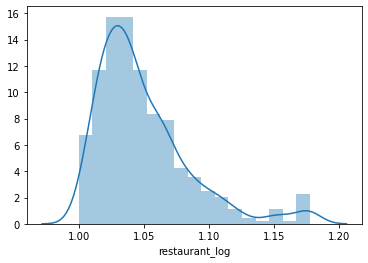

In [72]:
sns.distplot(df1['restaurant_log'])

In [42]:
df1.to_excel(excel_writer='ESD_log_all.xlsx')